# 1.
import necessary libs

In [76]:
#from pandas_datareader import data, wb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# 2.
import dataset and drop bad indexes

In [77]:
disney  = pd.read_csv('disney_movies.csv', index_col=0)

# 3.
preview dataset

In [78]:
#.head() shows first 5 rows of the dataset

disney.head()

,title,Production company,Country,Language,Running time,Budget,Box office,Release date,imdb,metascore,rotten_tomatoes,Directed by,Produced by,Based on,Starring,Music by,Distributed by,Cinematography,Edited by,Screenplay by
0,Academy Award Review of,Walt Disney Productions,United States,English,41.0,NaN,4.547200e+01,5/19/1937,7.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Snow White and the Seven Dwarfs,Walt Disney Productions,United States,English,83.0,1490000.0,4.180000e+08,12/21/1937,7.6,95.0,NaN,"['David Hand (supervising)', 'William Cottrell...",Walt Disney,"['Snow White', 'by The', 'Brothers Grimm']","['Adriana Caselotti', 'Lucille La Verne', 'Har...","['Frank Churchill', 'Paul Smith', 'Leigh Harli...",RKO Radio Pictures,NaN,NaN,NaN
2,Pinocchio,Walt Disney Productions,United States,English,88.0,2600000.0,1.640000e+08,2/7/1940,7.4,99.0,73%,"['Ben Sharpsteen', 'Hamilton Luske', 'Bill Rob...",Walt Disney,"['The Adventures of Pinocchio', 'by', 'Carlo C...","['Cliff Edwards', 'Dickie Jones', 'Christian R...","['Leigh Harline', 'Paul J. Smith']",RKO Radio Pictures,NaN,NaN,NaN
3,Fantasia,Walt Disney Productions,United States,English,126.0,2280000.0,8.330000e+07,11/13/1940,7.7,96.0,95%,"['Samuel Armstrong', 'James Algar', 'Bill Robe...","['Walt Disney', 'Ben Sharpsteen']",NaN,"['Leopold Stokowski', 'Deems Taylor']",See program,RKO Radio Pictures,James Wong Howe,NaN,NaN
4,The Reluctant Dragon,Walt Disney Productions,United States,English,74.0,600000.0,9.600000e+05,6/20/1941,6.9,NaN,68%,"['Alfred Werker', '(live action)', 'Hamilton L...",Walt Disney,NaN,"['Robert Benchley', 'Frances Gifford', 'Buddy ...","['Frank Churchill', 'Larry Morey']",RKO Radio Pictures,Bert Giennon,Paul Weatherwax,NaN


In [79]:
#so we have 20 cols and about 440+ rows quite large

disney.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444 entries, 0 to 443
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               444 non-null    object 
 1   Production company  399 non-null    object 
 2   Country             441 non-null    object 
 3   Language            443 non-null    object 
 4   Running time        430 non-null    float64
 5   Budget              278 non-null    float64
 6   Box office          358 non-null    float64
 7   Release date        435 non-null    object 
 8   imdb                424 non-null    float64
 9   metascore           293 non-null    float64
 10  rotten_tomatoes     391 non-null    object 
 11  Directed by         443 non-null    object 
 12  Produced by         435 non-null    object 
 13  Based on            221 non-null    object 
 14  Starring            409 non-null    object 
 15  Music by            433 non-null    object 
 16  Distribu

# 4 
find total number of NaN values, this filters out values that cant be worked


In [80]:
missing_val = disney.isnull().sum()

missing_val.sum()

1202

# 5. 
drop NaN values.

we drop NAN values to make a complete dataset we can work with

as a result we managed to get 53 rows, the `dropna()` really sizes the dataset down 

In [81]:
disney_ = disney.dropna().reset_index(drop = True)

disney_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               53 non-null     object 
 1   Production company  53 non-null     object 
 2   Country             53 non-null     object 
 3   Language            53 non-null     object 
 4   Running time        53 non-null     float64
 5   Budget              53 non-null     float64
 6   Box office          53 non-null     float64
 7   Release date        53 non-null     object 
 8   imdb                53 non-null     float64
 9   metascore           53 non-null     float64
 10  rotten_tomatoes     53 non-null     object 
 11  Directed by         53 non-null     object 
 12  Produced by         53 non-null     object 
 13  Based on            53 non-null     object 
 14  Starring            53 non-null     object 
 15  Music by            53 non-null     object 
 16  Distribute

# 6
formatting the rotten_tomatoes and imdb ratings columns

In [82]:
#this converts rotten_tomatoes ratings from string to float
rt = []

for i in disney_['rotten_tomatoes']:
    y = list(i)
    y.remove('%')
    z = ''.join(y)
    rt.append(float(z))

rt[:5]

[50.0, 89.0, 100.0, 66.0, 88.0]

In [83]:
disney_['rotten_tomatoes2'] = pd.Series(rt, index=range(0,len(rt)))


disney_.rotten_tomatoes2.head()

0     50.0
1     89.0
2    100.0
3     66.0
4     88.0
Name: rotten_tomatoes2, dtype: float64

In [84]:
#this converts imdbs ratings to 10x, so calculation of min,max rated movies are easier
imdb = []

for x in disney_['imdb']:
    y = x * 10
    imdb.append(y)

imdb[:5]

[71.0, 72.0, 78.0, 71.0, 62.0]

In [85]:
disney_['imdb2'] = pd.Series(imdb, index=range(0,len(imdb)))

disney_['imdb2'].head()

0    71.0
1    72.0
2    78.0
3    71.0
4    62.0
Name: imdb2, dtype: float64

# 7 
by using `.groupby()` method, we can see that we have each score from the three ratings but if we want to calculate the average of all these scores, it is much harder thus the ratings are all grouped into one

In [86]:
disney_.groupby(by=['title'])[['metascore','rotten_tomatoes2','imdb2']].min().sort_values(by='metascore', ascending=False).head()

,metascore,rotten_tomatoes2,imdb2
title,,,
Dumbo,96.0,98.0,72.0
Beauty and the Beast,95.0,94.0,80.0
The Lion King,88.0,93.0,85.0
Mary Poppins,88.0,100.0,78.0
"20,000 Leagues Under the Sea",83.0,89.0,72.0


# 8
first make an average rating of all ratings (`metascore`, `imdb` and `rotten_tomatoes`) included in the dataset call it `avg_ratings`

In [87]:
disney_['avg_ratings'] = (disney_.metascore + disney_.rotten_tomatoes2 + disney_.imdb2)/3

disney_.head()

,title,Production company,Country,Language,Running time,Budget,Box office,Release date,imdb,metascore,...,Based on,Starring,Music by,Distributed by,Cinematography,Edited by,Screenplay by,rotten_tomatoes2,imdb2,avg_ratings
0,Song of the South,Walt Disney Productions,United States,English,94.0,2125000.0,65000000.0,11/12/1946,7.1,54.0,...,"['Uncle Remus', 'by', 'Joel Chandler Harris']","['James Baskett', 'Bobby Driscoll', 'Luana Pat...","['Edward Plumb', 'Daniele Amfitheatrof', 'Paul...",RKO Radio Pictures,Gregg Toland,William M. Morgan,"['Live action:', 'Morton Grant', 'Maurice Rapf...",50.0,71.0,58.333333
1,"20,000 Leagues Under the Sea",Walt Disney Productions,United States,English,127.0,5000000.0,28200000.0,12/23/1954,7.2,83.0,...,"['Twenty Thousand Leagues Under the Sea', 'by'...","['Kirk Douglas', 'James Mason', 'Paul Lukas', ...","['Paul Smith', 'Joseph S. Dubin', '(orchestrat...",Buena Vista Distribution,Franz Planer,Elmo Williams,Earl Felton,89.0,72.0,81.333333
2,Mary Poppins,Walt Disney Productions,United States,English,139.0,4.4,103100000.0,8/27/1964,7.8,88.0,...,"['Mary Poppins', 'by', 'P. L. Travers']","['Julie Andrews', 'Dick Van Dyke', 'David Toml...","['Richard M. Sherman', 'Robert B. Sherman']",Buena Vista Distribution,Edward Colman,Cotton Warburton,"['Bill Walsh', 'Don DaGradi']",100.0,78.0,88.666667
3,Bedknobs and Broomsticks,Walt Disney Productions,United States,English,118.0,6300000.0,17900000.0,10/7/1971,7.1,59.0,...,"['The Magic Bedknob', '&', 'Bonfires and Broom...","['Angela Lansbury', 'David Tomlinson', 'John E...",Irwin Kostal,Buena Vista Distribution,Frank V. Phillips,Cotton Warburton,"['Bill Walsh', 'Don DaGradi']",66.0,71.0,65.333333
4,Freaky Friday,Walt Disney Productions,United States,English,95.0,5000000.0,36000000.0,12/20/1976,6.2,70.0,...,"['Freaky Friday', 'by Mary Rodgers']","['Jodie Foster', 'Barbara Harris', 'John Astin']",Johnny Mandel,Buena Vista Distribution,Charles F. Wheeler,Cotton Warburton,Mary Rodgers,88.0,62.0,73.333333


# 9
groupby() once again is used for grouping the `avg_ratings` and `title` columns, now we can get the top movies

In [88]:
highestrated = disney_.groupby(by=['title'])[['avg_ratings']].max().sort_values(by='avg_ratings', ascending=False)

highestrated.iloc[:5]

,avg_ratings
title,
Beauty and the Beast,89.666667
Mary Poppins,88.666667
The Lion King,88.666667
Dumbo,88.666667
The Nightmare Before Christmas,85.666667


# 10
we can now get the lowest rated movies as well based off of `avg_ratings`

In [89]:
lowestrated = disney_.groupby(by=['title'])[['avg_ratings']].min().sort_values(by='avg_ratings')

lowestrated.iloc[:5]

,avg_ratings
title,
Confessions of a Teenage Drama Queen,31.333333
Flubber,38.000000
The Three Musketeers,39.333333
The Lone Ranger,43.666667
Pirates of the Caribbean: Dead Men Tell No Tales,44.333333


# 11
kdeplot shows the density of values, with the most concentrated ratings ranging from the 50s to 60s, this tells us most movies were actually quite mid. this is a good thing not good or bad hh

also seaborn lib here is for visualization, we found top and lowest rated movies, but the chart gives more insight here.

from the chart, `imdb` ratings have a high density ranging from 40s to 90s regions

`metascore` ranging from 20s to 100s

and `rotten_tomatoes2` from 0s to 100s

<AxesSubplot:xlabel='Ratings', ylabel='Density'>

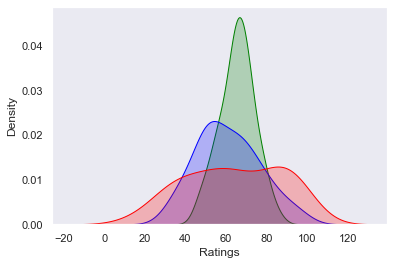

In [90]:
disney_['avg_ratings']


plt.xlabel('Ratings')

sns.kdeplot(disney_['imdb2'], color='green', shade=True, cbar=True)
sns.kdeplot(disney_['metascore'], color='blue', shade=True, cbar=True)
sns.kdeplot(disney_['rotten_tomatoes2'], color='red', shade=True, cbar=True)



# 12
 the combination of the 3 kdpelots look messy, using the `avg_ratings` column we should get a better outlook of where the density of valuea re most concentrated in 

 and that is exactly the case, we get most of the density between 50s and 70s and now we can locate which movies fall between those ranges.

<AxesSubplot:xlabel='AVERAGE RATINGS', ylabel='Count'>

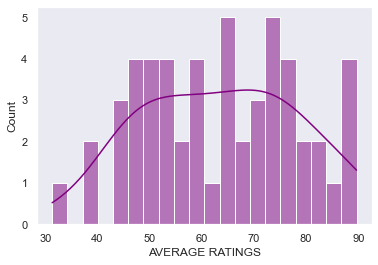

In [91]:
plt.xlabel('AVERAGE RATINGS')
sns.histplot(disney_['avg_ratings'], color='purple', kde=True, bins=20)

C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='avg_ratings'>

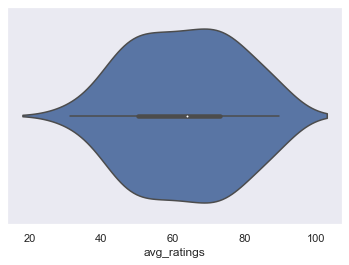

In [92]:
sns.violinplot(df)

# 13
we never got what mid movies would be like because we could not create a criteria for what the ratings would be.

with the help of the maps, we now get the idea that they fall within 50s-70s of the `avg_ratings`. 

total of 20 movies are found

In [93]:
top_movies = highestrated[highestrated>70]
top_movies.dropna(inplace=True)

top_movies

,avg_ratings
title,
Beauty and the Beast,89.666667
Mary Poppins,88.666667
The Lion King,88.666667
Dumbo,88.666667
The Nightmare Before Christmas,85.666667
Arrietty,83.666667
"20,000 Leagues Under the Sea",81.333333
Big Hero 6,80.333333
James and the Giant Peach,78.666667


In [94]:
mid_movies = highestrated[highestrated>=50][highestrated<=70]
mid_movies.dropna(inplace=True)

mid_movies.head()

,avg_ratings
title,
Eight Below,69.666667
Muppet Treasure Island,68.000000
Into the Woods,66.333333
Bedknobs and Broomsticks,65.333333
White Fang,64.666667


In [95]:
low_rated_movies = highestrated[highestrated<50]
low_rated_movies.dropna(inplace=True)

low_rated_movies.head()

,avg_ratings
title,
National Treasure: Book of Secrets,49.666667
The Sorcerer's Apprentice,49.000000
101 Dalmatians,49.000000
Around the World in 80 Days,46.666667
Mars Needs Moms,46.666667


# 14
making the `Release date` column from `str` to `datetime` format 

afterwards we make individual columns grouping into `Month` and `Year`

In [96]:
type(disney_['Release date'][0])

str

In [97]:
disney_['Release date'] = pd.to_datetime(disney_['Release date'])
#successfully converted to timestamp
type(disney_['Release date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [98]:
#makes individual columns for year and month based off of the Release date column
disney_['Month'] = disney_['Release date'].apply(lambda time: time.month)

disney_['Year'] = disney_['Release date'].apply(lambda time: time.year)
#successfully gotten the years in an ascending order
disney_.Year.head()

0    1946
1    1954
2    1964
3    1971
4    1976
Name: Year, dtype: int64

In [99]:
#we have gotten the months also in an ascending order but could use some formatting, replacing the numbers with their respective names
disney_.Month

0     11
1     12
2      8
3     10
4     12
5     12
6      7
7      6
8      1
9      7
10    11
11     7
12     2
13     4
14    11
15     7
16    11
17     7
18    12
19     8
20    10
21     4
22     8
23     2
24     6
25     6
26     9
27    12
28     1
29     2
30    10
31    12
32     5
33     3
34     2
35     7
36     3
37     7
38     2
39     9
40     6
41     5
42    10
43    10
44    12
45     2
46     1
47     2
48     5
49    11
50     3
51     7
52     3
Name: Month, dtype: int64

In [100]:
mmap = {1: 'Jan', 2: 'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

#apply ze function to the Month column

disney_.Month = disney_.Month.map(mmap)

disney_.Month.head()

0    Nov
1    Dec
2    Aug
3    Oct
4    Dec
Name: Month, dtype: object

<AxesSubplot:xlabel='Year', ylabel='Count'>

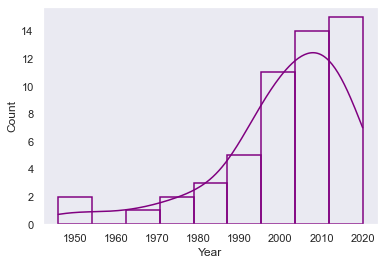

In [101]:
#from the histplot we observe that most movies actually >1/2 of the movies were produced after the 2000s
sns.histplot(x='Year', data=disney_, kde=True, color='purple', fill=False)

<AxesSubplot:xlabel='Month', ylabel='Count'>

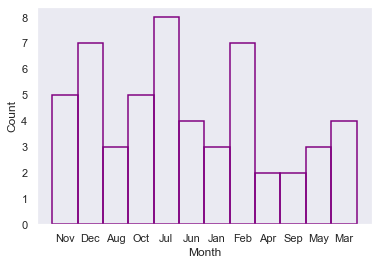

In [102]:
#what info can we get from the months? lots of movies released in february, july and dec 7,8 and 7 respectively.

sns.histplot(x='Month', data=disney_, color='purple', bins=30, fill=False)

# 15 
finding correlations

In [103]:
disney_.head()

,title,Production company,Country,Language,Running time,Budget,Box office,Release date,imdb,metascore,...,Music by,Distributed by,Cinematography,Edited by,Screenplay by,rotten_tomatoes2,imdb2,avg_ratings,Month,Year
0,Song of the South,Walt Disney Productions,United States,English,94.0,2125000.0,65000000.0,1946-11-12,7.1,54.0,...,"['Edward Plumb', 'Daniele Amfitheatrof', 'Paul...",RKO Radio Pictures,Gregg Toland,William M. Morgan,"['Live action:', 'Morton Grant', 'Maurice Rapf...",50.0,71.0,58.333333,Nov,1946
1,"20,000 Leagues Under the Sea",Walt Disney Productions,United States,English,127.0,5000000.0,28200000.0,1954-12-23,7.2,83.0,...,"['Paul Smith', 'Joseph S. Dubin', '(orchestrat...",Buena Vista Distribution,Franz Planer,Elmo Williams,Earl Felton,89.0,72.0,81.333333,Dec,1954
2,Mary Poppins,Walt Disney Productions,United States,English,139.0,4.4,103100000.0,1964-08-27,7.8,88.0,...,"['Richard M. Sherman', 'Robert B. Sherman']",Buena Vista Distribution,Edward Colman,Cotton Warburton,"['Bill Walsh', 'Don DaGradi']",100.0,78.0,88.666667,Aug,1964
3,Bedknobs and Broomsticks,Walt Disney Productions,United States,English,118.0,6300000.0,17900000.0,1971-10-07,7.1,59.0,...,Irwin Kostal,Buena Vista Distribution,Frank V. Phillips,Cotton Warburton,"['Bill Walsh', 'Don DaGradi']",66.0,71.0,65.333333,Oct,1971
4,Freaky Friday,Walt Disney Productions,United States,English,95.0,5000000.0,36000000.0,1976-12-20,6.2,70.0,...,Johnny Mandel,Buena Vista Distribution,Charles F. Wheeler,Cotton Warburton,Mary Rodgers,88.0,62.0,73.333333,Dec,1976


<AxesSubplot:>

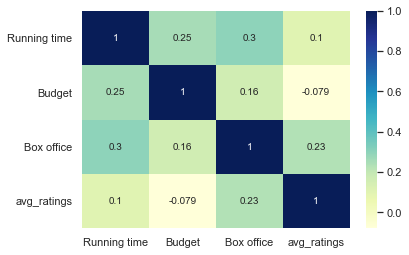

In [104]:
rb = disney_.corr()
to_drop=['imdb','imdb2','rotten_tomatoes2', 'metascore', 'Year']

rb.drop(to_drop, inplace=True, axis=1)
rb.drop(to_drop, inplace=True, axis=0)


sns.heatmap(rb, annot=True, cmap='YlGnBu')

#note how theres positive corr between budget n box office,avg_ratings n box office and running time and box office n budget which makes sense higher running time, higher the budget and so forth

#as for negative correlations which onluy occurs once btwn budget and avg_ratings, nearly insignificant but there, as budget increases the avg_ratings reduce weird but i think this is affected by the data presented note disney_['Budget'][2] is 4.4 whereas others have various zeros

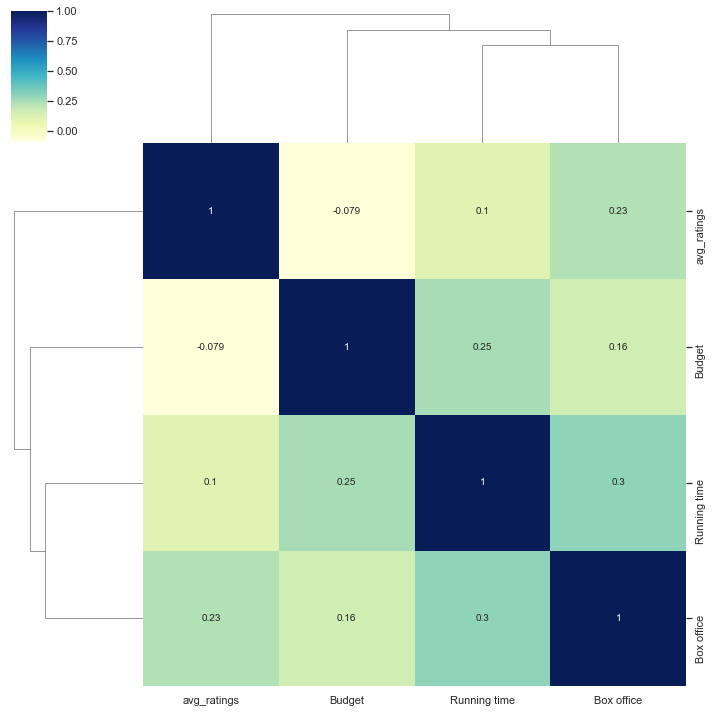

In [105]:
#clustermap here just gives a better view but in clusters
sns.clustermap(rb, annot=True, cmap='YlGnBu')

<AxesSubplot:>

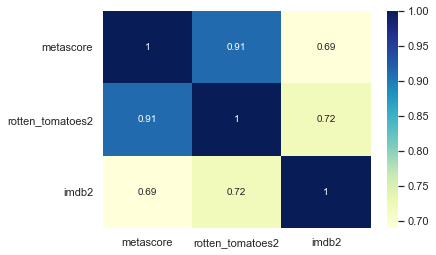

In [106]:
#individual ratings we can see that they're all positively correlated, so if a movie has a low metascore rating most likely it will get a low rotten tomatoes or imdb rating

nu = disney_.corr()
to_drop = ['Year', 'Budget', 'imdb', 'Box office', 'Running time', 'avg_ratings']

nu.drop(to_drop, inplace=True, axis=0)
nu.drop(to_drop, inplace=True, axis=1)
sns.heatmap(nu, annot=True, cmap='YlGnBu')

In [107]:
pp = disney_[['title', 'Box office']].sort_values(by='title')

pp.head()

,title,Box office
14,101 Dalmatians,3.207000e+08
1,"20,000 Leagues Under the Sea",2.820000e+07
42,"Alexander and the Terrible, Horrible, No Good,...",1.007000e+08
34,Alice in Wonderland,1.025000e+09
11,Angels in the Outfield,5.020000e+07


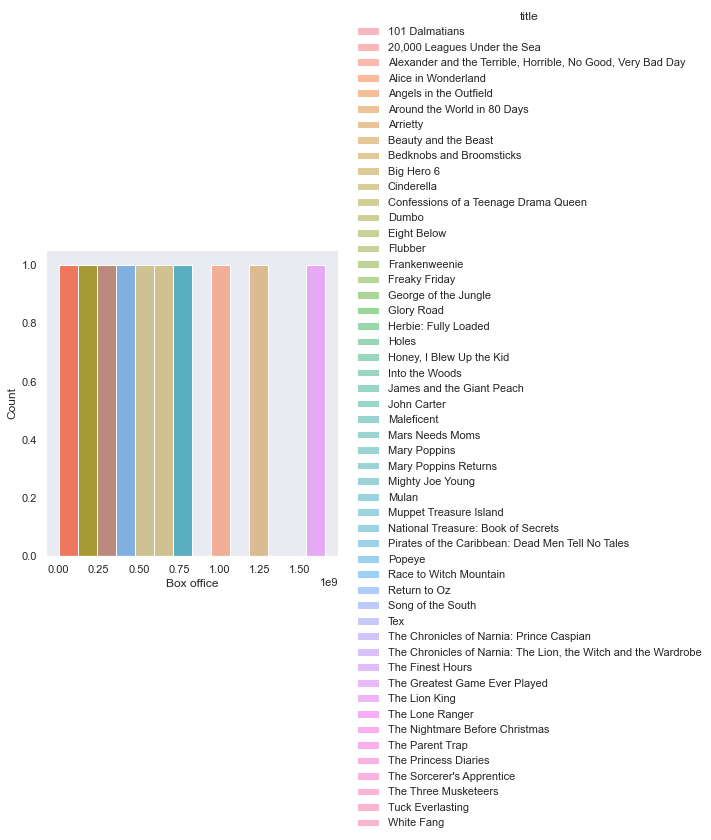

In [108]:
sns.displot(x='Box office', data=pp, hue='title')

In [109]:
tl = disney_[['title', 'Language']].sort_values(by='title')
tl.head()

,title,Language
14,101 Dalmatians,English
1,"20,000 Leagues Under the Sea",English
42,"Alexander and the Terrible, Horrible, No Good,...",English
34,Alice in Wonderland,English
11,Angels in the Outfield,English


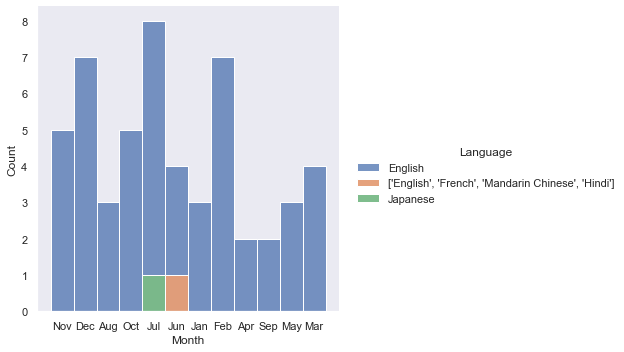

In [110]:
sns.displot(data=disney_, x='Month', hue='Language', kind='hist', multiple='stack')

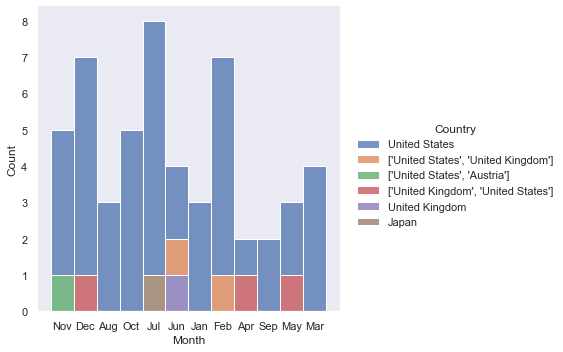

In [111]:
sns.displot(data=disney_, x='Month', hue='Country', kind='hist', multiple='stack')

In [112]:
disney_.head()

,title,Production company,Country,Language,Running time,Budget,Box office,Release date,imdb,metascore,...,Music by,Distributed by,Cinematography,Edited by,Screenplay by,rotten_tomatoes2,imdb2,avg_ratings,Month,Year
0,Song of the South,Walt Disney Productions,United States,English,94.0,2125000.0,65000000.0,1946-11-12,7.1,54.0,...,"['Edward Plumb', 'Daniele Amfitheatrof', 'Paul...",RKO Radio Pictures,Gregg Toland,William M. Morgan,"['Live action:', 'Morton Grant', 'Maurice Rapf...",50.0,71.0,58.333333,Nov,1946
1,"20,000 Leagues Under the Sea",Walt Disney Productions,United States,English,127.0,5000000.0,28200000.0,1954-12-23,7.2,83.0,...,"['Paul Smith', 'Joseph S. Dubin', '(orchestrat...",Buena Vista Distribution,Franz Planer,Elmo Williams,Earl Felton,89.0,72.0,81.333333,Dec,1954
2,Mary Poppins,Walt Disney Productions,United States,English,139.0,4.4,103100000.0,1964-08-27,7.8,88.0,...,"['Richard M. Sherman', 'Robert B. Sherman']",Buena Vista Distribution,Edward Colman,Cotton Warburton,"['Bill Walsh', 'Don DaGradi']",100.0,78.0,88.666667,Aug,1964
3,Bedknobs and Broomsticks,Walt Disney Productions,United States,English,118.0,6300000.0,17900000.0,1971-10-07,7.1,59.0,...,Irwin Kostal,Buena Vista Distribution,Frank V. Phillips,Cotton Warburton,"['Bill Walsh', 'Don DaGradi']",66.0,71.0,65.333333,Oct,1971
4,Freaky Friday,Walt Disney Productions,United States,English,95.0,5000000.0,36000000.0,1976-12-20,6.2,70.0,...,Johnny Mandel,Buena Vista Distribution,Charles F. Wheeler,Cotton Warburton,Mary Rodgers,88.0,62.0,73.333333,Dec,1976


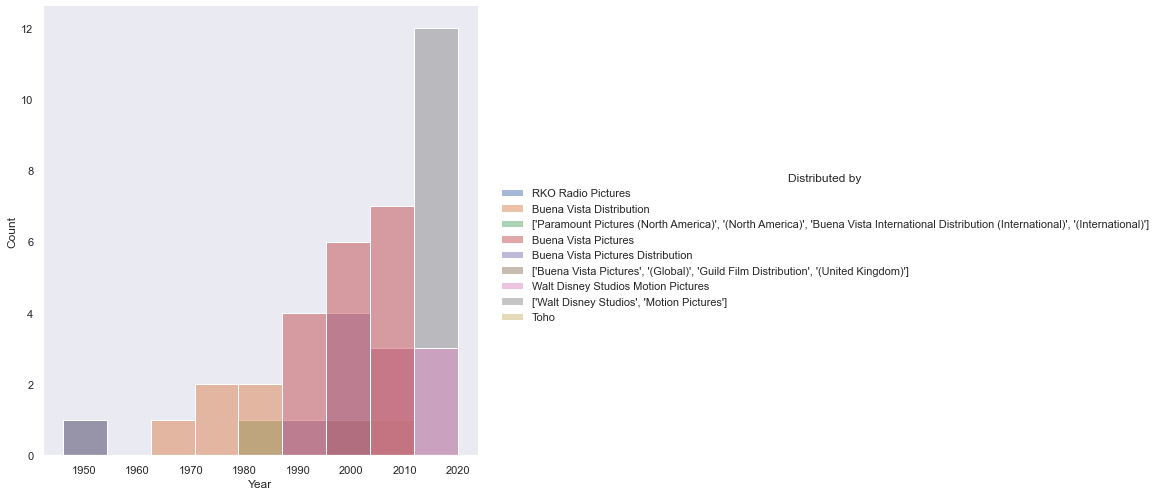

In [113]:
sns.color_palette('ch:s=.25,rot=-.25', as_cmap=True)

sns.displot(data=disney_, x='Year', hue='Distributed by', kind='hist', height=7)

In [114]:
import plotly
import cufflinks as cf
cf.go_offline()

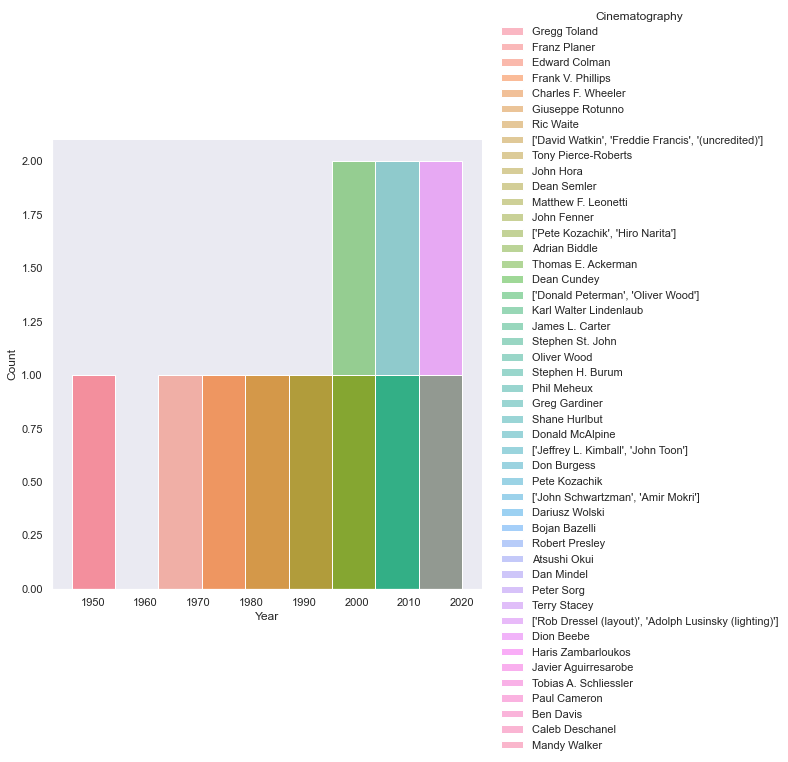

In [117]:
sns.color_palette('ch:s=.25,rot=-.25', as_cmap=True)

sns.displot(data=disney_, x='Year', hue='Cinematography', kind='hist', height=7)